In [1]:
#slow version of hypergeometric distribution  - Multiprocessing
#https://www.matburo.ru/tvart_sub.php?p=calc_gg_ticket
import math
import decimal
import threading
from loguru import logger
import multiprocessing
from collections import OrderedDict

total_tickets = 100000
win_tickets = 2000
bought_tickets = 50
range_tickets = range(0,3)
lose_tickets = total_tickets - win_tickets

#geom_prob_dict = []
threads = list()

def calc_prob(probability_win_for_tickets,total_tickets,win_tickets,bought_tickets,lose_tickets,geom_prob_dict):
    probability_non_win_for_tickets = bought_tickets - probability_win_for_tickets
    c_n = decimal.Decimal(math.factorial(total_tickets)) / decimal.Decimal((math.factorial(bought_tickets) * math.factorial(total_tickets - bought_tickets)))
    c_k = decimal.Decimal(math.factorial(win_tickets)) / decimal.Decimal((math.factorial(probability_win_for_tickets) * math.factorial(win_tickets - probability_win_for_tickets)))
    c_n_k = decimal.Decimal(math.factorial(lose_tickets)) / decimal.Decimal((math.factorial(probability_non_win_for_tickets) * math.factorial(lose_tickets - probability_non_win_for_tickets)))
    p = (c_k * c_n_k) / c_n
    print(f"p {probability_win_for_tickets} = "+str(p))

    if probability_win_for_tickets == 0:
        geom_prob_dict[-1] = {'label':'No Win','value':p}
        p = 1-p
        geom_prob_dict[probability_win_for_tickets] = {'label':'=>1','value':p}
    else:
        geom_prob_dict[probability_win_for_tickets] = {'label':'='+str(probability_win_for_tickets),'value':p}
        

if __name__ == "__main__":
    manager = multiprocessing.Manager()
    geom_prob_dict = manager.dict()
    jobs = []
    for probability_win_for_tickets in range_tickets:
        p = multiprocessing.Process(target=calc_prob, args=(probability_win_for_tickets,total_tickets,win_tickets,bought_tickets,lose_tickets,geom_prob_dict))
        jobs.append(p)
        p.start()

    for proc in jobs:
        proc.join()


geom_prob_dict = OrderedDict(sorted(geom_prob_dict.items())) #sorting by key in dictionary
geom_prob_dict




p 1 = 0.3716946419047114046433389872
p 0 = 0.3640786186920838679621969713
p 2 = 0.1858454236218167408333658176
{1: {'label': '=1', 'value': Decimal('0.3716946419047114046433389872')}, -1: {'label': 'No Win', 'value': Decimal('0.3640786186920838679621969713')}, 0: {'label': '=>1', 'value': Decimal('0.6359213813079161320378030287')}, 2: {'label': '=2', 'value': Decimal('0.1858454236218167408333658176')}}


'\nfor probability_win_for_tickets in range_tickets:\n    x = threading.Thread(target=calc_prob, args=(probability_win_for_tickets,total_tickets,win_tickets,bought_tickets,lose_tickets,geom_prob_dict))\n    x.start()\n    threads.append(x)\n    #print("c_n ="+str(c_n))\n    #print("c_k ="+str(c_k))\n    #print("c_n_k ="+str(c_n_k))\n\nfor index, thread in enumerate(threads):\n    logger.info(f"Main    : before joining thread {index}." )\n    thread.join()\n    logger.info(f"Main    : thread {index} done")\n'

In [353]:

#fast version of hypergeometric distribution
from scipy.stats import hypergeom
import numpy as np
[M, n, N] = [1000000, 20000, 500]
rv = hypergeom(M, n, N)
x = np.arange(0, 20)
pmf_dogs = rv.pmf(x)

geom_prob_dict = {}
geom_prob_dict_cum = {}
cnt = 0
i_cum = 0
for i in pmf_dogs:
    i_cum += i
    r_or_more =  1-i_cum
    if cnt == 0:
        geom_prob_dict[-1] = {'label':'No Win','value':i}
        geom_prob_dict_cum[-1] = {'label':'No Win','value':i}
        
        geom_prob_dict[cnt] = {'label':'=>1','value':1-i}
        geom_prob_dict_cum[cnt] = {'label':'=>1','value':1-i}
    else:
        geom_prob_dict[cnt] = {'label':'='+str(cnt),'value':i}
        geom_prob_dict_cum[cnt] = {'label':'='+str(cnt),'value':r_or_more}

    cnt += 1
    
    
#geom_prob_dict
geom_prob_dict_cum

{-1: {'label': 'No Win', 'value': 4.091963921448097e-05},
 0: {'label': '=>1', 'value': 0.9999590803607855},
 1: {'label': '=1', 'value': 0.9995413203053298},
 2: {'label': '=2', 'value': 0.9974131792237985},
 3: {'label': '=3', 'value': 0.9902006215819174},
 4: {'label': '=4', 'value': 0.9719051197165569},
 5: {'label': '=5', 'value': 0.9348547564767756},
 6: {'label': '=6', 'value': 0.8724581850717262},
 7: {'label': '=7', 'value': 0.7825743117047718},
 8: {'label': '=8', 'value': 0.6695143874685081},
 9: {'label': '=9', 'value': 0.5433667574177429},
 10: {'label': '=10', 'value': 0.41695535980701615},
 11: {'label': '=11', 'value': 0.30203602475349123},
 12: {'label': '=12', 'value': 0.20647032930639608},
 13: {'label': '=13', 'value': 0.13326585424884452},
 14: {'label': '=14', 'value': 0.08130509108785489},
 15: {'label': '=15', 'value': 0.04695441230479391},
 16: {'label': '=16', 'value': 0.02570975659093011},
 17: {'label': '=17', 'value': 0.013369716207740634},
 18: {'label': '

In [354]:
#bernuli slow version
import math
# https://www.matburo.ru/tvart_sub.php?p=calc_bern_ticket
bought_tickets =500
probability_for_one_ticket = 20000/1000000
#probability_win_for_tickets = 0
range_tickets = range(0,20)

bernuli_prob_dict = {}
for probability_win_for_tickets in range_tickets:
    c_k_n = math.factorial(bought_tickets) / ( math.factorial(probability_win_for_tickets)  * math.factorial(bought_tickets-probability_win_for_tickets)  ) 
    p_k = probability_for_one_ticket**probability_win_for_tickets
    p_1_n_minus_k = (1-probability_for_one_ticket)**(bought_tickets-probability_win_for_tickets)
    p = c_k_n*p_k*p_1_n_minus_k
    #print("c_k_n ="+str(c_k_n))
    #print("p_k ="+str(p_k))
    #print("p_1_n_minus_k ="+str(p_1_n_minus_k))
    
    if probability_win_for_tickets ==0:
        bernuli_prob_dict[-1] = {'label':'No Win','value':p}
        p = 1-p
        bernuli_prob_dict[0] = {'label':'=>1','value':p}
    else:
        bernuli_prob_dict[probability_win_for_tickets] = {'label':'='+str(probability_win_for_tickets),'value':p}
    #print(f"p {probability_win_for_tickets} = "+str(p))
    
print(bernuli_prob_dict)


{-1: {'label': 'No Win', 'value': 4.1023985145472214e-05}, 0: {'label': '=>1', 'value': 0.9999589760148545}, 1: {'label': '=1', 'value': 0.00041861209332114504}, 2: {'label': '=2', 'value': 0.0021315044343597086}, 3: {'label': '=3', 'value': 0.007221015022524727}, 4: {'label': '=4', 'value': 0.01831043094997341}, 5: {'label': '=5', 'value': 0.037069280617089036}, 6: {'label': '=6', 'value': 0.06241256430428257}, 7: {'label': '=7', 'value': 0.08988864946447693}, 8: {'label': '=8', 'value': 0.11304873516833451}, 9: {'label': '=9', 'value': 0.1261223984190943}, 10: {'label': '=10', 'value': 0.12637979106892916}, 11: {'label': '=11', 'value': 0.11489071915357198}, 12: {'label': '=12', 'value': 0.09554687358179711}, 13: {'label': '=13', 'value': 0.07319760487899056}, 14: {'label': '=14', 'value': 0.05196389734120759}, 15: {'label': '=15', 'value': 0.034359801507247476}, 16: {'label': '=16', 'value': 0.0212557445548661}, 17: {'label': '=17', 'value': 0.012350276548085468}, 18: {'label': '=18

In [355]:
import scipy.stats as scs

probability_win_for_tickets = 20
bought_tickets = 500
probability_for_one_ticket = 20000/1000000

trials = 0
trials_cumulative = 0

bernuli_prob_dict_cumilative = {}
bernuli_prob_dict = {}

for i in range(probability_win_for_tickets):
    trials_cumulative += scs.binom.pmf(i, bought_tickets, probability_for_one_ticket)
    trials = scs.binom.pmf(i, bought_tickets, probability_for_one_ticket)
    r_or_more =  1-trials_cumulative
    r_exact = 1-trials
    if i == 0:
        bernuli_prob_dict_cumilative[-1] = {'label':'No Win','value':trials}
        bernuli_prob_dict_cumilative[0] = {'label':'=>1','value':r_or_more}
        
        bernuli_prob_dict[-1] = {'label':'No Win','value':trials}
        bernuli_prob_dict[0] = {'label':'=>1','value':r_exact}
        
    else:
        bernuli_prob_dict_cumilative[i] = {'label':'=>'+str(i),'value':r_or_more}
        bernuli_prob_dict[i] = {'label':'=>'+str(i),'value':trials}
        
bernuli_prob_dict

{-1: {'label': 'No Win', 'value': 4.1023985145472214e-05},
 0: {'label': '=>1', 'value': 0.9999589760148545},
 1: {'label': '=>1', 'value': 0.0004186120933211522},
 2: {'label': '=>2', 'value': 0.0021315044343597263},
 3: {'label': '=>3', 'value': 0.00722101502252478},
 4: {'label': '=>4', 'value': 0.01831043094997357},
 5: {'label': '=>5', 'value': 0.037069280617089376},
 6: {'label': '=>6', 'value': 0.06241256430428314},
 7: {'label': '=>7', 'value': 0.08988864946447775},
 8: {'label': '=>8', 'value': 0.11304873516833555},
 9: {'label': '=>9', 'value': 0.1261223984190956},
 10: {'label': '=>10', 'value': 0.1263797910689306},
 11: {'label': '=>11', 'value': 0.1148907191535732},
 12: {'label': '=>12', 'value': 0.09554687358179795},
 13: {'label': '=>13', 'value': 0.07319760487899105},
 14: {'label': '=>14', 'value': 0.05196389734120813},
 15: {'label': '=>15', 'value': 0.03435980150724781},
 16: {'label': '=>16', 'value': 0.021255744554866295},
 17: {'label': '=>17', 'value': 0.0123502

In [356]:
# De Moivre–Laplace theorem
#https://www.berdov.com/works/teorver/integralnaya-teorema-muavra-laplasa/
#https://ru.stackoverflow.com/questions/542603/%D0%9A%D0%B0%D0%BA-%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8-%D0%BB%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0-python
import scipy.stats
import math

def laplace_f(x):
	return scipy.stats.norm.cdf(x)-0.5
	
def func_1(k,n,p,q):
    l = laplace_f( (k-n*p) / math.sqrt(n*p*q))
    #print((k-n*p) / math.sqrt(n*p*q))
    return l

total_tickets = 500

probability = 20000/1000000
q_prob = 1 - probability

print(str(total_tickets*probability*q_prob) + "=>10???")

laplace_prob_dict = {}
range_tickets = range(1,20)
for probability_win_for_tickets in range_tickets:
    p = func_1(total_tickets,total_tickets,probability,q_prob) - func_1(probability_win_for_tickets,total_tickets,probability,q_prob)
    if probability_win_for_tickets == 1:
        laplace_prob_dict[0] = {'label':'No Win','value':1-p}
    laplace_prob_dict[probability_win_for_tickets] = {'label':'>='+str(probability_win_for_tickets),'value':p}

print(laplace_prob_dict)




9.8=>10???
{0: {'label': 'No Win', 'value': 0.0020204923419928633}, 1: {'label': '>=1', 'value': 0.9979795076580071}, 2: {'label': '>=2', 'value': 0.9946983273089387}, 3: {'label': '>=3', 'value': 0.9873263406612659}, 4: {'label': '>=4', 'value': 0.972357503641488}, 5: {'label': '>=5', 'value': 0.9448884768225674}, 6: {'label': '>=6', 'value': 0.8993317573562996}, 7: {'label': '>=7', 'value': 0.8310479904484975}, 8: {'label': '>=8', 'value': 0.7385483827436647}, 9: {'label': '>=9', 'value': 0.6253029075187146}, 10: {'label': '>=10', 'value': 0.5}, 11: {'label': '>=11', 'value': 0.37469709248128535}, 12: {'label': '>=12', 'value': 0.26145161725633526}, 13: {'label': '>=13', 'value': 0.16895200955150247}, 14: {'label': '>=14', 'value': 0.10066824264370045}, 15: {'label': '>=15', 'value': 0.05511152317743262}, 16: {'label': '>=16', 'value': 0.027642496358512014}, 17: {'label': '>=17', 'value': 0.0126736593387341}, 18: {'label': '>=18', 'value': 0.005301672691061299}, 19: {'label': '>=19',

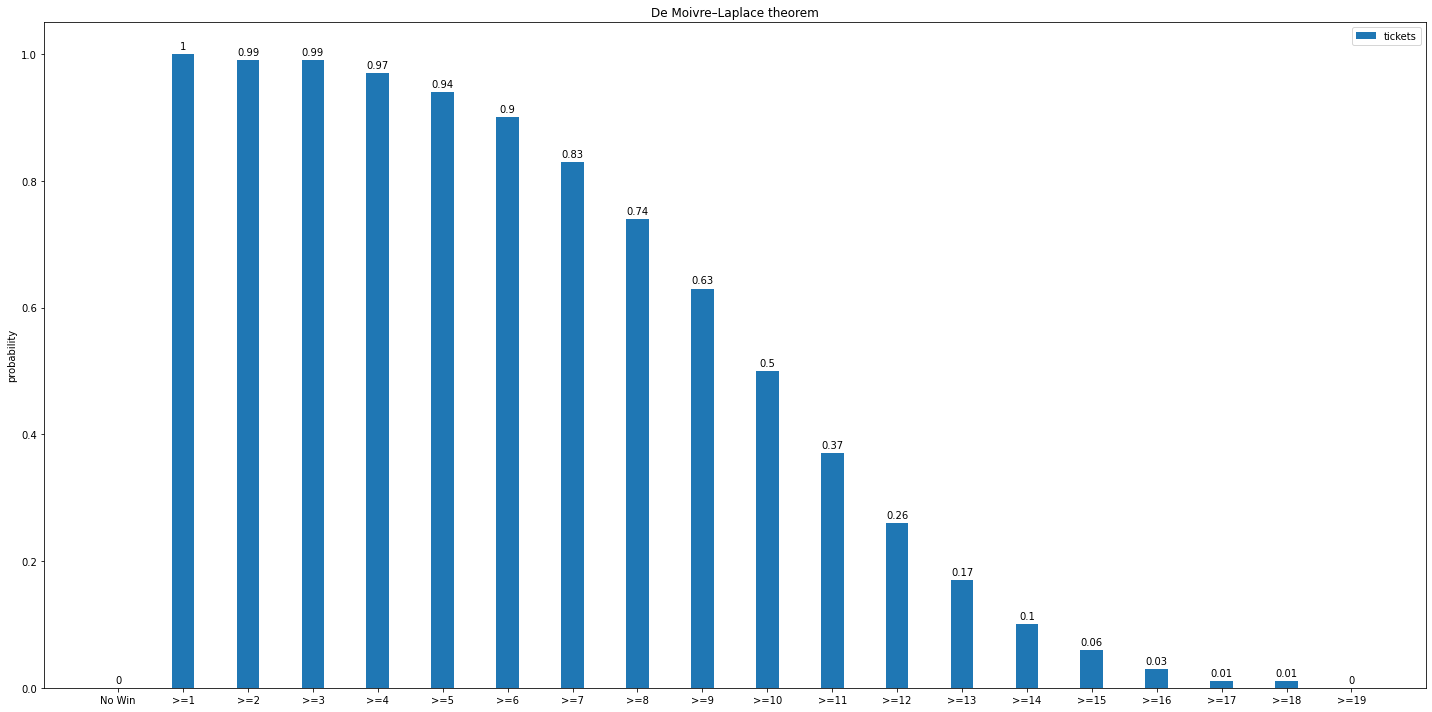

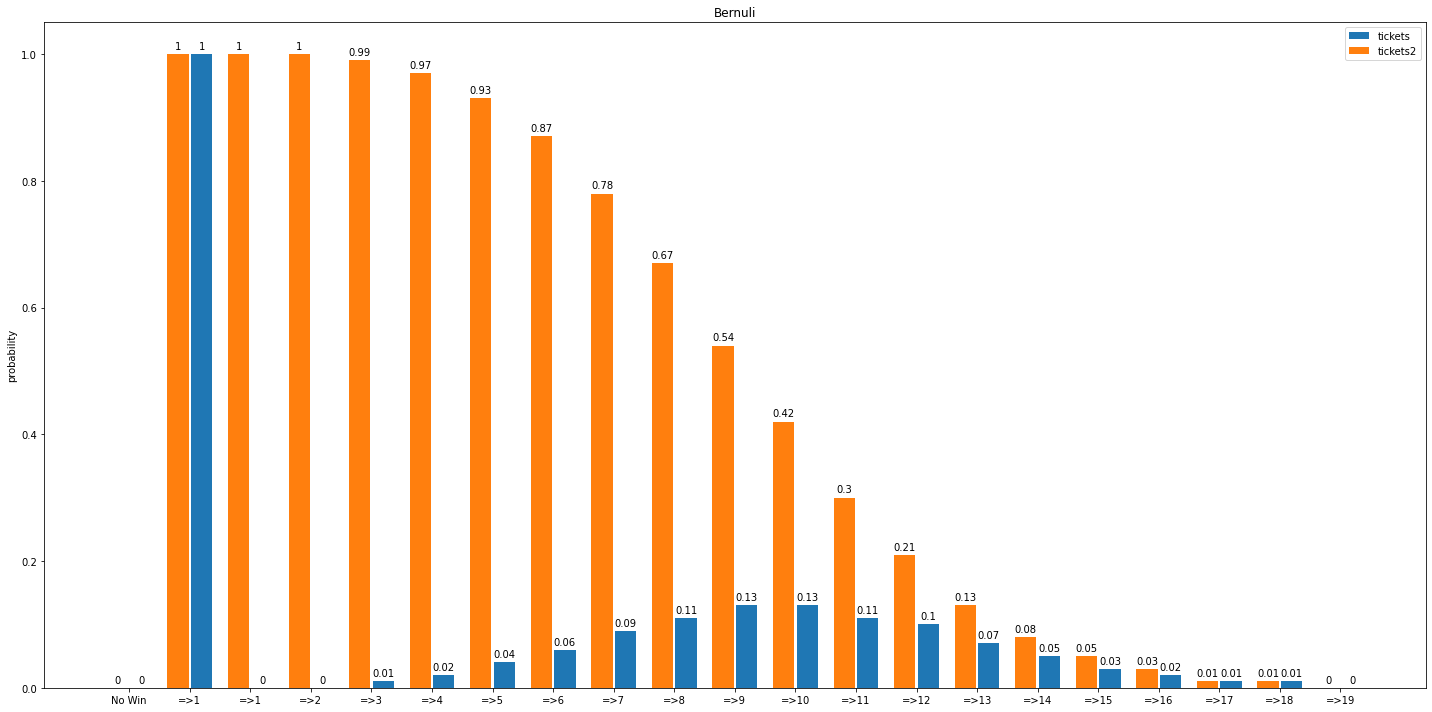

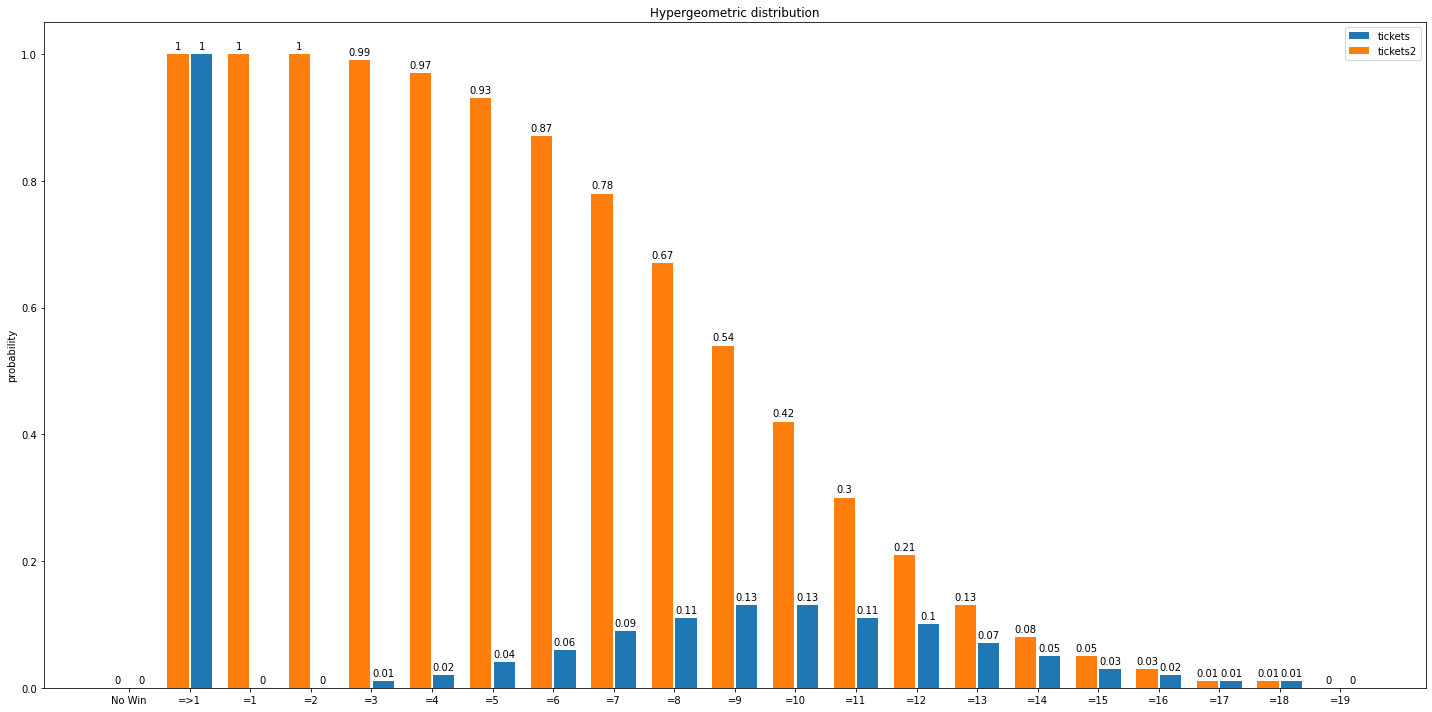

In [361]:

import matplotlib.pyplot as plt
import numpy as np

def print_plot(labels,y,title,labels2 = [],y2 = []):
    shift = 0
    if len(labels2):
        shift = 0.35/1.8
        
    x = np.arange(len(labels))
    fig, ax = plt.subplots()
    p1 = ax.bar(x+shift, y,0.35, label='tickets')
    #plt.set_xticks(x,labels = labels)
    fig.set_size_inches(20, 10)
    ax.bar_label(p1, padding=3)
    
    if len(labels2):
        
        p2 = ax.bar(x-shift, y2, 0.35, label='tickets2')
        ax.bar_label(p2, padding=3)
        
    #rects1 = ax.bar(x - width/2, men_means, width, label='Men')
    #rects2 = ax.bar(x + width/2, women_means, width, label='Women')
    plt.xticks(x,labels = labels)
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('probability')
    ax.set_title(title)
    fig.tight_layout()
    ax.legend()
    plt.show()


def parse_arr(array_plot ,title, array_plot2 = []):
    labels = []
    x = []
    y = []
    labels2 = []
    x2 = []
    y2 = []
    for arr in array_plot:
        #print(arr)
        labels.append(array_plot[arr]['label'])
        y.append(round(float(array_plot[arr]['value']),2))
        x.append(float(arr))
        
    for arr2 in array_plot2:
        #print(arr)
        labels2.append(array_plot2[arr2]['label'])
        y2.append(round(float(array_plot2[arr2]['value']),2))
        x2.append(float(arr2))
    
    if labels2: 
        print_plot(labels,y, title, x2,y2)
    else:
        print_plot(labels,y, title)



    
parse_arr(laplace_prob_dict,'De Moivre–Laplace theorem')

parse_arr(bernuli_prob_dict,'Bernuli',bernuli_prob_dict_cumilative)
parse_arr(geom_prob_dict,'Hypergeometric distribution',geom_prob_dict_cum)





[-0.2  0.8  1.8  2.8  3.8  4.8  5.8  6.8  7.8  8.8]


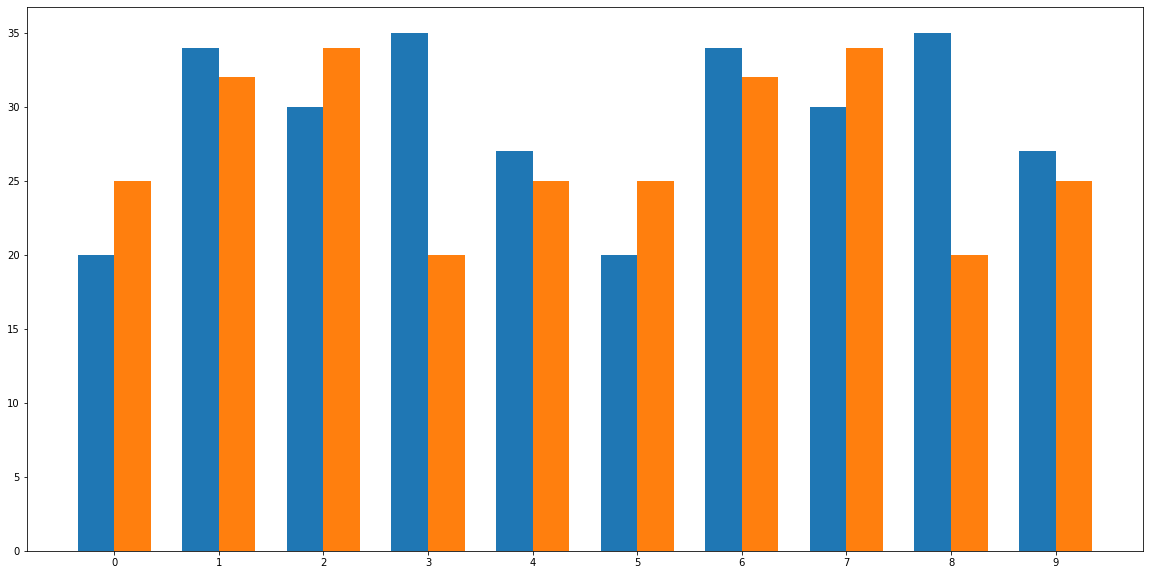

In [362]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5','G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27,20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25,25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
print(x-0.2)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
plt.xticks(x)

plt.show()